In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9)

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [6]:
y_pred=model.predict(x_test)

[[25  5]
 [ 0 10]]


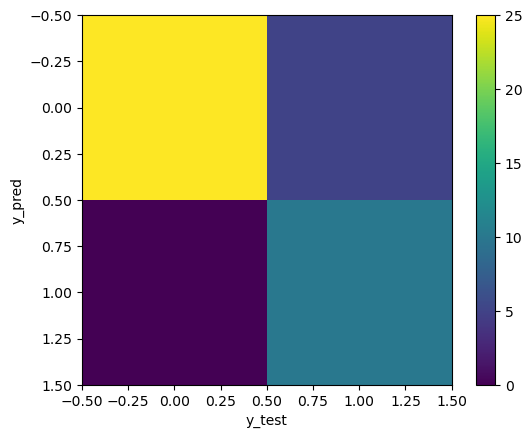

In [7]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print(cm)
plt.imshow(cm)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.colorbar()
plt.show()

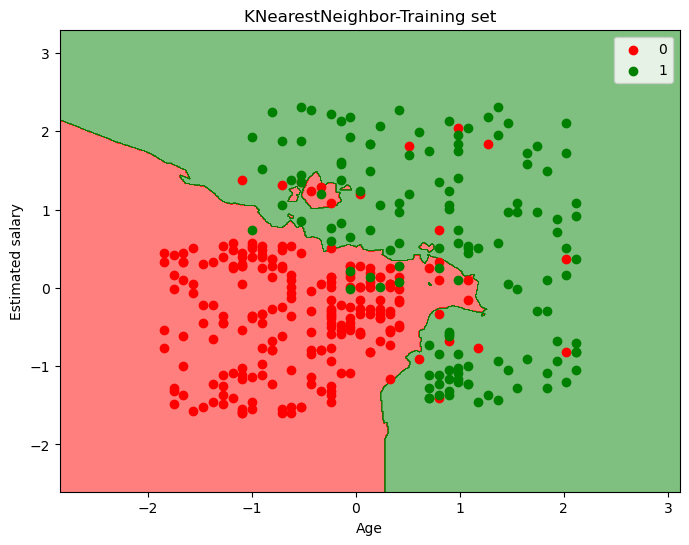

In [12]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start=x_train[:, 0].min() - 1, stop=x_train[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_train[:, 1].min() - 1, stop=x_train[:, 1].max() + 1, step=0.01))
Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)
cmap=ListedColormap(('red','green'))
plt.figure(figsize=(8,6))
plt.contourf(X1,X2,Z,alpha=0.5,cmap=cmap)
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],color='red',label='0')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color='green',label='1')
plt.title('KNearestNeighbor-Training set')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()

plt.show()

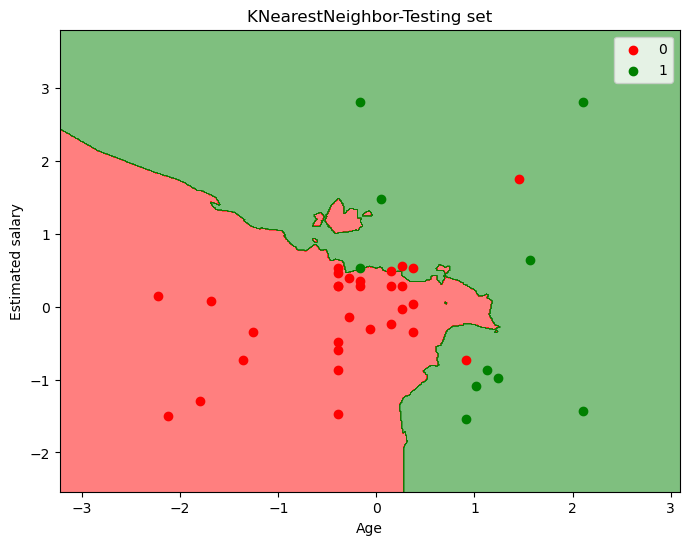

In [14]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start=x_test[:, 0].min() - 1, stop=x_test[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_test[:, 1].min() - 1, stop=x_test[:, 1].max() + 1, step=0.01))
Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)
cmap=ListedColormap(('red','green'))
plt.figure(figsize=(8,6))
plt.contourf(X1,X2,Z,alpha=0.5,cmap=cmap)
plt.scatter(x_test[y_test==0,0],x_test[y_test==0,1],color='red',label='0')
plt.scatter(x_test[y_test==1,0],x_test[y_test==1,1],color='green',label='1')
plt.title('KNearestNeighbor-Testing set')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()